In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

%store -r DISCO_ROOT_FOLDER
if "DISCO_ROOT_FOLDER" in globals():
    os.chdir(DISCO_ROOT_FOLDER)
    sys.path.append(DISCO_ROOT_FOLDER)

(1440, 16384) (1440,)


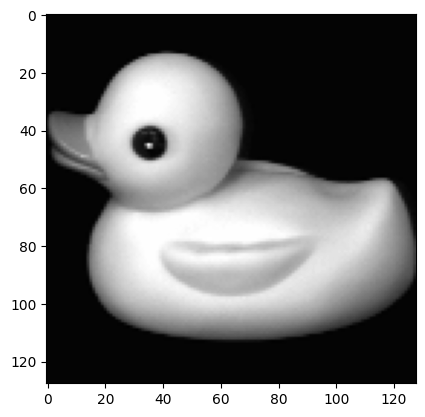

In [2]:
from datasets.real_world_datasets import Datasets as RealWorldDatasets

%matplotlib inline
# %matplotlib widget

import math
from matplotlib import pyplot as plt

X, l = RealWorldDatasets.COIL20.data_cached
print(X.shape, l.shape)

data = X[0]
data = data.reshape(int(math.sqrt(len(data))), -1)

plt.imshow(data, cmap='gray')
plt.show()

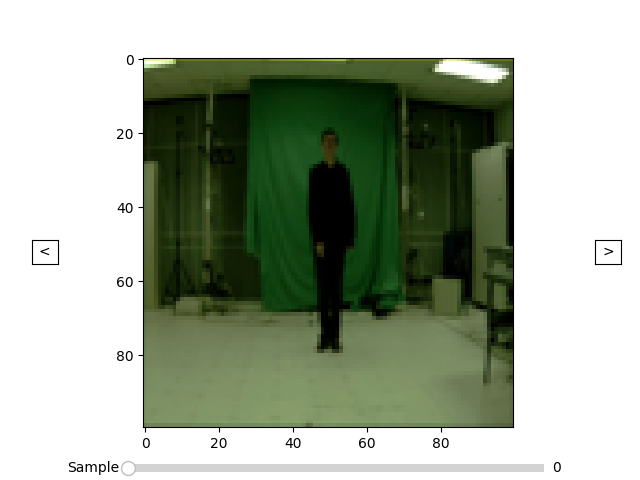

In [3]:
from datasets.real_world_datasets import Datasets as RealWorldDatasets

# %matplotlib inline
%matplotlib widget

import math
from matplotlib import pyplot as plt
from matplotlib.widgets import Slider, Button


X_, l = RealWorldDatasets.Keck.data_cached_no_noise
X = X_.reshape(-1, int(math.sqrt(len(X_[0]) // 3)), int(math.sqrt(len(X_[0]) // 3)), 3)

fig, ax = plt.subplots()
img = ax.imshow(X[0])

ax_slider = plt.axes((0.2, 0.01, 0.65, 0.03))
axpos1 = plt.axes((0.05, 0.45, 0.04, 0.05))
axpos2 = plt.axes((0.93, 0.45, 0.04, 0.05))

slider = Slider(ax_slider, "Sample", 0, len(X), valinit=0)
button1 = Button(axpos1, '<', color='w', hovercolor='b')
button2 = Button(axpos2, '>', color='w', hovercolor='b')

def update(val):
    val = int(val)
    ax.imshow(X[val])
    fig.canvas.draw_idle()

def forward(vl):
    slider.set_val(min(len(X), slider.val + 1))
    update(slider.val)
def backward(vl):
    slider.set_val(max(0, slider.val - 1))
    update(slider.val)


button1.on_clicked(backward)
button2.on_clicked(forward)

slider.on_changed(update)
plt.show()

In [4]:
plt.cla()
plt.clf()
plt.close()

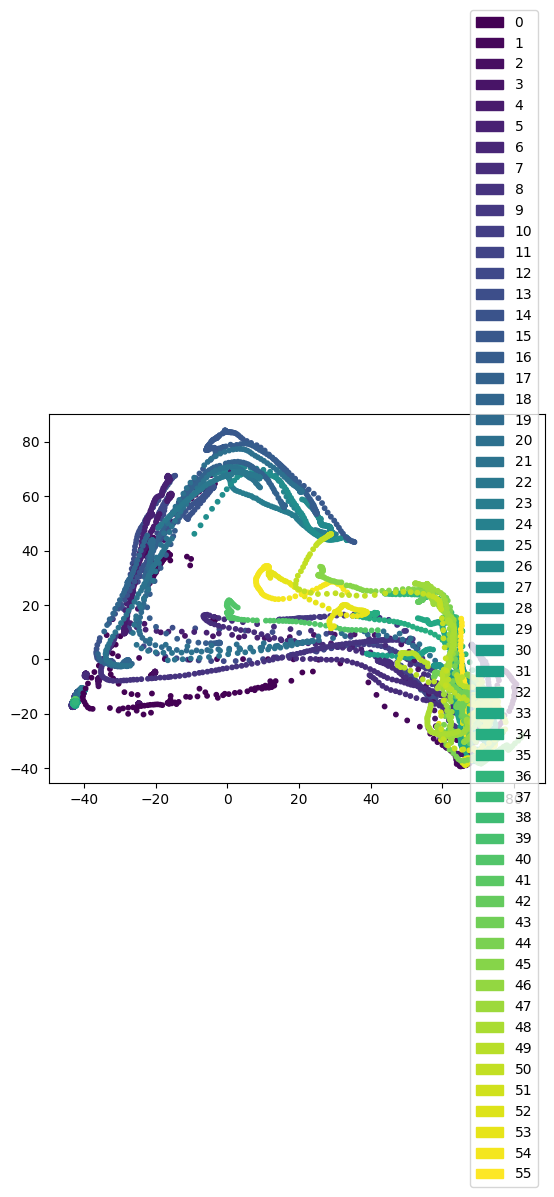

In [ ]:
%matplotlib inline

from clustpy.utils import plot_with_transformation

XX, l = RealWorldDatasets.Keck.standardized_data_cached
plot_with_transformation(XX[l!=-1], l[l!=-1])

In [4]:
%load_ext autoreload
%autoreload 2

import os
import sys

%store -r DISCO_ROOT_FOLDER
if "DISCO_ROOT_FOLDER" in globals():
    os.chdir(DISCO_ROOT_FOLDER)
    sys.path.append(DISCO_ROOT_FOLDER)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(17898, 8) (17898,) 16259 1639


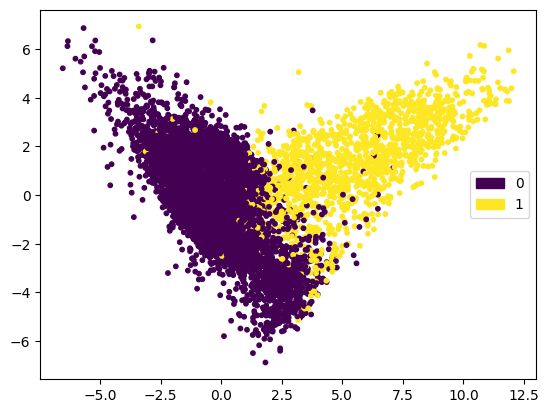

In [5]:
from datasets.real_world_datasets import Datasets as RealWorldDatasets
from clustpy.utils import plot_with_transformation

X, l = RealWorldDatasets.htru2.standardized_data_cached

print(X.shape, l.shape, len(l[l==0]), len(l[l!=0]))

plot_with_transformation(X, l)

In [6]:
from sklearn.metrics import pairwise_distances

pairw_dists_0 = pairwise_distances(X[l == 0], X[l == 0])
pairw_dists_1 = pairwise_distances(X[l == 1], X[l == 1])
print("0:", pairw_dists_0.min(), pairw_dists_0.mean(), pairw_dists_0.max())
print("1:", pairw_dists_1.min(), pairw_dists_1.mean(), pairw_dists_1.max())

pairw_dists = pairwise_distances(X[l==0], X[l==1])
print("cluster:", pairw_dists.min(), pairw_dists.mean(), pairw_dists.max())

pairw_dists = pairwise_distances(X, X)
print("total:", pairw_dists.min(), pairw_dists.mean(), pairw_dists.max())

0: 0.0 2.5742489611352815 17.232784938514335
1: 0.0 4.871462373560813 17.47421980150255
cluster: 0.07749541481137048 6.259233818226978 20.81651685773822
total: 0.0 3.2066105368941145 20.81651685773822


In [7]:
from src.Evaluation.dcdistances.dctree import DCTree
import numpy as np

pairw_dists_0 = DCTree(X[l == 0]).dc_distances()
pairw_dists_1 = DCTree(X[l == 1]).dc_distances()
print("0:", pairw_dists_0.min(), pairw_dists_0.mean(), pairw_dists_0.max())
print("1:", pairw_dists_1.min(), pairw_dists_1.mean(), pairw_dists_1.max())

dc_tree = DCTree(X)
pairw_dists = dc_tree.dc_distances(np.argwhere([l == 0])[:, 1], np.argwhere([l == 1])[:, 1])
print("cluster:", pairw_dists.min(), pairw_dists.mean(), pairw_dists.max())

pairw_dists = dc_tree.dc_distances()
print("total:", pairw_dists.min(), pairw_dists.mean(), pairw_dists.max())

0: 0.0 0.34701405338700464 3.433846826128181
1: 0.0 0.8063964823845625 6.703340505321162
cluster: 0.1469993342622576 0.6245748293750153 3.433846826128181
total: 0.0 0.390774890839484 3.433846826128181


In [9]:
from src.Evaluation import disco_samples

disco_values = disco_samples(X, l)
np.mean(disco_values[l == 0]), np.mean(disco_values[l == 1]), np.mean([np.mean(disco_values[l == 0]), np.mean(disco_values[l == 1])])

(0.4677391440037501, -0.17034389575672682, 0.14869762412351165)

In [10]:
len(l[l == 0]), len(l[l == 1])

(16259, 1639)

In [ ]:
from src.Evaluation.DISCO.disco import disco_samples

disco_values = disco_samples(X, l)

from sklearn.decomposition import PCA

pca = PCA(2)
X_ = pca.fit_transform(X)

In [ ]:
import matplotlib.colors as colors
import numpy as np


def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        "trunc({n},{a:.2f},{b:.2f})".format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)),
    )
    return new_cmap

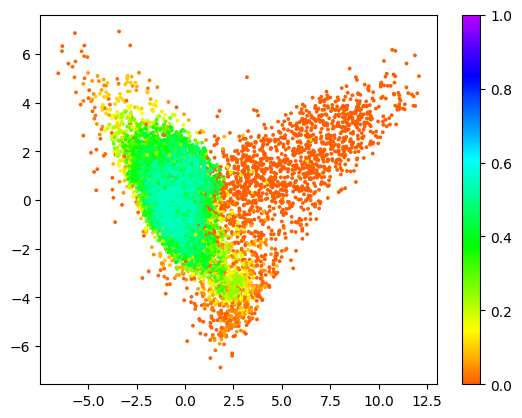

In [ ]:
import matplotlib.pyplot as plt

cmap = plt.colormaps["gist_rainbow"]
new_cmap = truncate_colormap(cmap, 0.1, 0.9)
ax = plt.scatter(X_[:, 0], X_[:, 1], s=3, c=disco_values, vmin=0, vmax=1, cmap=new_cmap)
plt.colorbar(ax)

plt.show()

In [ ]:
from src.Evaluation.DC_DUNN.dc_dunn import dc_dunn_score

dc_dunn_score(X, l)

0.04280893752852863

In [ ]:
from datasets.density_datasets import Datasets as DensityDatasets
from clustpy.utils import plot_with_transformation
from src.Evaluation.DISCO.disco import disco_samples
import matplotlib.colors as colors
import numpy as np


def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        "trunc({n},{a:.2f},{b:.2f})".format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)),
    )
    return new_cmap


X, l = DensityDatasets.aggregation.standardized_data_cached
disco_values = disco_samples(X, l)
np.mean(disco_values)

0.3056510576364597

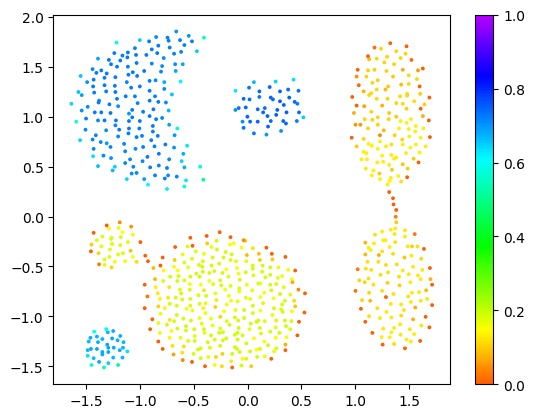

In [ ]:
import matplotlib.pyplot as plt

cmap = truncate_colormap(plt.colormaps["gist_rainbow"], 0.1, 0.9)
ax = plt.scatter(X[:, 0], X[:, 1], s=3, c=disco_values, vmin=0, vmax=1, cmap=cmap)
plt.colorbar(ax)

plt.show()

In [ ]:
idx = np.where((X[:,1] < -0.1) | (X[:,1] > 0.3))[0]
idx_ = np.where((X[:, 1] > -0.1) & (X[:, 1] < 0.3))[0]

X_ = X[idx]
l_ = l[idx]
disco_values_ = disco_samples(X_, l_)
np.mean(disco_values_)

0.4943315302890524

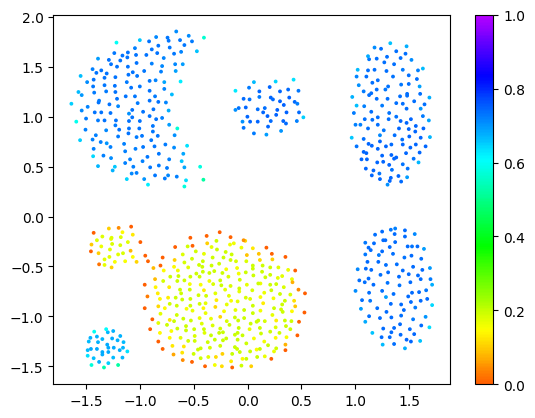

In [ ]:
import matplotlib.pyplot as plt

cmap = plt.colormaps["gist_rainbow"]
new_cmap = truncate_colormap(cmap, 0.1, 0.9)
ax = plt.scatter(X_[:, 0], X_[:, 1], s=3, c=disco_values_, vmin=0, vmax=1, cmap=new_cmap)
plt.colorbar(ax)

plt.show()

In [ ]:
l__ = l.copy()
l__[idx_] = 1
disco_values__ = disco_samples(X, l__)
np.mean(disco_values__)

0.2907245525360631

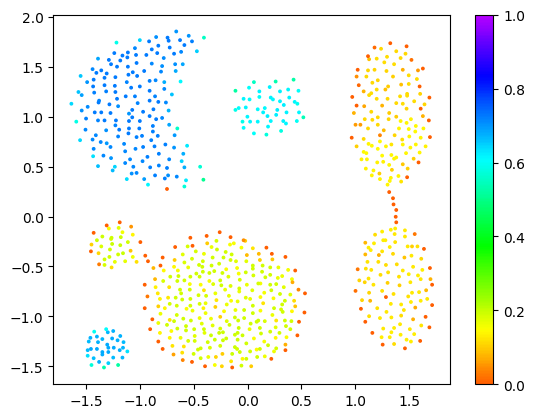

In [ ]:
import matplotlib.pyplot as plt

cmap = plt.colormaps["gist_rainbow"]
new_cmap = truncate_colormap(cmap, 0.1, 0.9)
ax = plt.scatter(X[:, 0], X[:, 1], s=3, c=disco_values__, vmin=0, vmax=1, cmap=new_cmap)
plt.colorbar(ax)

plt.show()

In [ ]:
from src.Evaluation.DCSI.dcsi import dcsi_score

dcsi_score(X, l, min_pts=34), "vs", dcsi_score(X_, l_), "vs", dcsi_score(X, l__, min_pts=10),

(-1, 'vs', 0.9712556836475597, 'vs', 0.9652712132982758)

In [ ]:
from src.Evaluation.DISCO.disco import disco_score

disco_score(X, l, min_points=35), "vs", disco_score(X_, l_), "vs", disco_score(X, l__, min_points=10), disco_score(X, l__, min_points=40),

(0.13127704214355213,
 'vs',
 0.4943315302890524,
 'vs',
 0.30103498256292244,
 0.14227244045765045)

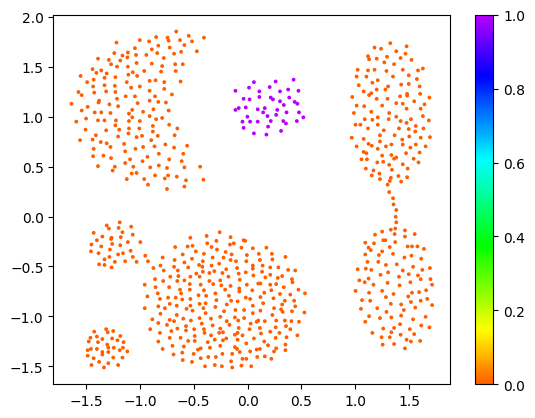

In [ ]:
import matplotlib.pyplot as plt

cmap = plt.colormaps["gist_rainbow"]
new_cmap = truncate_colormap(cmap, 0.1, 0.9)
cc = np.full(len(X), 0)
cc[l == 1] = 1
ax = plt.scatter(X[:, 0], X[:, 1], s=3, c=cc, vmin=0, vmax=1, cmap=new_cmap)
plt.colorbar(ax)

plt.show()

In [2]:
from src.Evaluation import disco_score as DISCO

def colored_DISCO(X, l):
    disco = round(DISCO(X, l), 2)
    if disco > 0:
        color = "Green"
        color_saturation = round(disco * 65 + 5)
    else:
        color = "Red"
        color_saturation = round(-disco * 65 + 5)
    return f"\\cellcolor{{{color}!{color_saturation}}} {disco}"

def print_info(dataset, file):
    X, l = dataset.standardized_data_cached
    l_set= set(l)
    l_set.discard(-1)
    file.write(f"& {dataset.name.replace("_", "\\_")} & {len(X):,} & {X.shape[1]:,} & {len(l_set):,} & {len(l[l==-1]):,} & {colored_DISCO(X,l)} & \\cite{{deric}}\\\\\n")

In [14]:
from datasets.density_datasets import Datasets as DensityDatasets

for dataset in DensityDatasets:
    print_info(dataset)

& 3-spiral & 312 & 2 & 3 & 0 & \cellcolor{Green!43} 0.59 & \cite{deric}\\
& aggregation & 788 & 2 & 7 & 0 & \cellcolor{Green!25} 0.31 & \cite{deric}\\
& chainlink & 1,000 & 3 & 2 & 0 & \cellcolor{Green!60} 0.84 & \cite{deric}\\
& cluto-t4-8k & 8,000 & 2 & 6 & 764 & \cellcolor{Green!21} 0.24 & \cite{deric}\\
& cluto-t5-8k & 8,000 & 2 & 6 & 1,153 & \cellcolor{Green!6} 0.01 & \cite{deric}\\
& cluto-t7-10k & 10,000 & 2 & 9 & 792 & \cellcolor{Green!24} 0.29 & \cite{deric}\\
& cluto-t8-8k & 8,000 & 2 & 8 & 323 & \cellcolor{Green!24} 0.3 & \cite{deric}\\
& complex8 & 2,551 & 2 & 8 & 0 & \cellcolor{Green!30} 0.39 & \cite{deric}\\
& complex9 & 3,031 & 2 & 9 & 0 & \cellcolor{Green!28} 0.36 & \cite{deric}\\
& compound & 399 & 2 & 6 & 0 & \cellcolor{Green!28} 0.35 & \cite{deric}\\
& dartboard1 & 1,000 & 2 & 4 & 0 & \cellcolor{Green!62} 0.87 & \cite{deric}\\
& diamond9 & 3,000 & 2 & 9 & 0 & \cellcolor{Green!19} 0.22 & \cite{deric}\\
& smile1 & 1,000 & 2 & 4 & 0 & \cellcolor{Green!64} 0.9 & \cite{de

In [ ]:
& 3-spiral & 312 & 2 & 3 & 0 & \cellcolor{Green!43} 0.59 & \cite{deric}\\
& aggregation & 788 & 2 & 7 & 0 & \cellcolor{Green!25} 0.31 & \cite{deric}\\
& chainlink & 1,000 & 3 & 2 & 0 & \cellcolor{Green!60} 0.84 & \cite{deric}\\
& cluto-t4-8k & 8,000 & 2 & 6 & 764 & \cellcolor{Green!21} 0.24 & \cite{deric}\\
& cluto-t5-8k & 8,000 & 2 & 6 & 1,153 & \cellcolor{Green!6} 0.01 & \cite{deric}\\
& cluto-t7-10k & 10,000 & 2 & 9 & 792 & \cellcolor{Green!24} 0.29 & \cite{deric}\\
& cluto-t8-8k & 8,000 & 2 & 8 & 323 & \cellcolor{Green!24} 0.3 & \cite{deric}\\
& complex8 & 2,551 & 2 & 8 & 0 & \cellcolor{Green!30} 0.39 & \cite{deric}\\
& complex9 & 3,031 & 2 & 9 & 0 & \cellcolor{Green!28} 0.36 & \cite{deric}\\
& compound & 399 & 2 & 6 & 0 & \cellcolor{Green!28} 0.35 & \cite{deric}\\
& dartboard1 & 1,000 & 2 & 4 & 0 & \cellcolor{Green!62} 0.87 & \cite{deric}\\
& diamond9 & 3,000 & 2 & 9 & 0 & \cellcolor{Green!19} 0.22 & \cite{deric}\\
& smile1 & 1,000 & 2 & 4 & 0 & \cellcolor{Green!64} 0.9 & \cite{deric}\\

In [ ]:
& 3-spiral & 312 & 2 & 3 & 0 & \cellcolor{Green!43} 0.58 & \cite{deric}\\
& aggregation & 788 & 2 & 7 & 0 & \cellcolor{Green!24} 0.3 & \cite{deric}\\
& chainlink & 1,000 & 3 & 2 & 0 & \cellcolor{Green!62} 0.88 & \cite{deric}\\
& cluto-t4-8k & 8,000 & 2 & 7 & 764 & \cellcolor{Green!21} 0.25 & \cite{deric}\\
& cluto-t5-8k & 8,000 & 2 & 7 & 1,153 & \cellcolor{Green!28} 0.36 & \cite{deric}\\
& cluto-t7-10k & 10,000 & 2 & 10 & 792 & \cellcolor{Green!17} 0.18 & \cite{deric}\\
& cluto-t8-8k & 8,000 & 2 & 9 & 323 & \cellcolor{Green!19} 0.22 & \cite{deric}\\
& complex8 & 2,551 & 2 & 8 & 0 & \cellcolor{Green!28} 0.36 & \cite{deric}\\
& complex9 & 3,031 & 2 & 9 & 0 & \cellcolor{Green!27} 0.34 & \cite{deric}\\
& compound & 399 & 2 & 6 & 0 & \cellcolor{Green!31} 0.4 & \cite{deric}\\
& dartboard1 & 1,000 & 2 & 4 & 0 & \cellcolor{Green!62} 0.87 & \cite{deric}\\
& diamond9 & 3,000 & 2 & 9 & 0 & \cellcolor{Green!19} 0.22 & \cite{deric}\\
& smile1 & 1,000 & 2 & 4 & 0 & \cellcolor{Green!64} 0.9 & \cite{deric}\\

In [3]:
from datasets.real_world_datasets import Datasets as RealWorldDatasets

with open("real_world_infos.txt", "w") as file:
    for dataset in RealWorldDatasets:
        print_info(dataset, file)
        file.flush()

In [ ]:
& Synth_low & 5,000 & 100 & 11 & 500 & \cellcolor{Green!56} 0.78 & \cite{deric}\\
& Synth_high & 5,000 & 100 & 11 & 500 & \cellcolor{Green!59} 0.83 & \cite{deric}\\
& HAR & 10,299 & 561 & 6 & 0 & \cellcolor{Green!4} -0.01 & \cite{deric}\\
& letterrec. & 20,000 & 16 & 26 & 0 & \cellcolor{Green!4} -0.02 & \cite{deric}\\
& htru2 & 17,898 & 8 & 2 & 0 & \cellcolor{Green!27} 0.34 & \cite{deric}\\
& Mice & 1,077 & 68 & 8 & 0 & \cellcolor{Green!4} -0.02 & \cite{deric}\\
& Pendigits & 10,992 & 16 & 10 & 0 & \cellcolor{Green!13} 0.13 & \cite{deric}\\
& Weizmann & 5,701 & 77,760 & 90 & 0 & \cellcolor{Green!15} 0.15 & \cite{deric}\\
& Keck & 25,457 & 30,000 & 57 & 12,535 & \cellcolor{Green!-22} -0.41 & \cite{deric}\\
& COIL20 & 1,440 & 16,384 & 20 & 0 & \cellcolor{Green!24} 0.3 & \cite{deric}\\
& COIL100 & 7,200 & 49,152 & 100 & 0 & \cellcolor{Green!22} 0.26 & \cite{deric}\\
& cmu_faces & 624 & 960 & 20 & 0 & \cellcolor{Green!10} 0.07 & \cite{deric}\\
& Optdigits & 5,620 & 64 & 10 & 0 & \cellcolor{Green!9} 0.06 & \cite{deric}\\
& USPS & 9,298 & 256 & 10 & 0 & \cellcolor{Green!4} -0.01 & \cite{deric}\\
& MNIST & 70,000 & 784 & 10 & 0 & \cellcolor{Green!4} -0.02 & \cite{deric}\\
& FMNIST & 70,000 & 784 & 10 & 0 & \cellcolor{Green!0} -0.07 & \cite{deric}\\
& KMNIST & 70,000 & 784 & 10 & 0 & \cellcolor{Green!2} -0.05 & \cite{deric}\\